<a href="https://colab.research.google.com/github/yorion01/beginning/blob/main/image_classification(0-9num).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch

In [ ]:
transform = T.Compose([
                T.ToTensor()
            ])

dataset_train = datasets.MNIST('dataset', train=True, download=True, transform=transform)
dataset_test = datasets.MNIST('dataset', train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 200365839.08it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 126976618.26it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 162131737.54it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7839723.77it/s]


Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



torch.Size([1, 1, 28, 28])

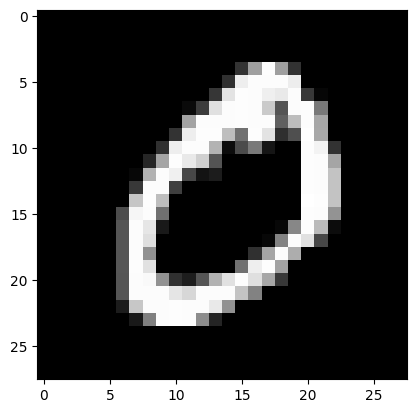

In [ ]:
x = dataset_train[1][0]

plt.imshow( x[0], cmap='gray' )
x = x.unsqueeze(0) # add batch dim
x.size()

In [ ]:
batch_size = 64
train_loader = DataLoader(dataset_train, batch_size=batch_size, sampler=sampler.SubsetRandomSampler(range(0, len(dataset_train) * 4//5)), drop_last=True)
val_loader = DataLoader(dataset_train, batch_size=batch_size, sampler=sampler.SubsetRandomSampler(range(len(dataset_train) * 4//5, len(dataset_train))), drop_last=True)
test_loader = DataLoader(dataset_test, batch_size=batch_size, drop_last=True)

In [ ]:
for x,y in train_loader:
  print("X 크기 : {}".format(x.shape[1:]))
  print("y 크기 : {}".format(y.shape[1:]))
  break

X 크기 : torch.Size([1, 28, 28])
y 크기 : torch.Size([])


In [ ]:
# 데이터 & 모델에 device 붙임!!!
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'{device} is available')

cuda:0 is available


### VGG 모델

In [ ]:
torchvision.models.vgg11(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [ ]:
class VGG(nn.Module):
  def __init__(self, in_channels=1):
    super(VGG,self).__init__()

    self.model = torchvision.models.vgg11(pretrained=True)
    self.model.features[0] = nn.Conv2d(in_channels,64,kernel_size=3,stride=1,padding=1,)
    self.model.features = self.model.features[:15]
    self.model.classifier[6] = nn.Linear(4096,10)

  def forward(self,x):
    return self.model(x)


In [ ]:
model = VGG().to(device)
basic_data = torch.rand(64,1,28,28)
model(basic_data.to(device))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


tensor([[ 2.5100e-02, -1.2526e-01,  7.0201e-02, -4.2998e-02, -2.4999e-02,
         -5.9819e-02,  1.6602e-01,  2.9810e-01, -4.9141e-02, -1.0118e-01],
        [-7.8845e-02,  4.9256e-02,  2.7100e-01,  6.7675e-02,  1.7462e-02,
          1.7586e-01,  5.4357e-02,  1.5130e-01, -3.1348e-03,  1.1208e-01],
        [-4.4111e-02, -5.9130e-02,  1.7050e-01,  3.3381e-01,  9.2228e-02,
          5.8210e-02,  2.7422e-01,  1.2119e-01, -6.5940e-02, -9.7443e-02],
        [-1.2630e-01, -2.1839e-01,  3.2358e-01,  3.4354e-02, -1.2296e-01,
          1.1966e-01,  1.9564e-01,  2.9208e-01,  2.7464e-01,  5.1429e-02],
        [-1.9441e-03,  5.5917e-02,  2.6170e-03,  3.8831e-02,  1.9986e-01,
         -7.8504e-02,  1.2347e-01,  2.3530e-01,  1.2828e-01, -5.1407e-02],
        [-6.2287e-02, -1.3440e-02,  5.9972e-02, -7.0762e-02, -3.2092e-02,
         -7.5491e-02,  7.9584e-02,  3.9960e-01,  4.7481e-02,  6.8855e-02],
        [-2.0625e-01,  1.4747e-01,  8.3401e-02,  1.4947e-01,  5.2228e-02,
         -5.9484e-02,  1.5543e-0

### Resnet 모델

In [ ]:
torchvision.models.resnet152(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
class Resnet(nn.Module):
  def __init__(self, in_channels=1):


  def forward(self,x):



In [ ]:
model = Resnet().to(device)
basic_data = torch.rand(64,1,28,28)
model(basic_data.to(device))

tensor([[-0.1825,  0.3272,  0.0199, -0.1611,  0.3800, -0.0597, -0.5043, -0.0028,
          0.0115, -0.3209],
        [-0.2796, -0.3270,  0.6246, -0.4413, -0.5419, -0.1559, -0.0569,  0.0309,
         -0.7635, -0.0217],
        [-0.3865, -0.2417, -0.1933, -0.2917, -0.2743,  0.5846, -0.1997, -0.3651,
         -0.1538,  0.1159],
        [ 0.2106,  0.4426,  0.6804, -0.1645,  0.0430,  0.3708,  0.3288, -0.0190,
         -0.4511,  0.1665],
        [-0.0731,  0.3629,  1.1336, -0.6766, -0.5273, -0.5811,  0.9866, -0.2289,
         -0.6695, -0.5360],
        [-1.1566,  0.0034, -0.2808,  0.2442, -1.0094, -0.0599,  0.5758,  0.3949,
         -0.1518,  0.3093],
        [ 0.2774, -0.0127,  0.7796,  0.2487, -0.3145, -0.1267,  0.2222, -0.0064,
         -0.5487, -0.2832],
        [ 0.1675, -0.2041, -0.1825, -0.0772, -0.6724,  0.5247, -0.1070, -0.1756,
         -0.2349, -0.3674],
        [ 0.2239, -0.0490,  0.3470,  0.1564, -0.1049,  0.0131, -0.3629,  0.2515,
         -0.2802,  0.1470],
        [-0.2910, -

### 학습하기

In [ ]:
num_epochs = 5
lr = 0.00003
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
loss_graph = [] # 그래프 그릴 목적인 loss.
train_n = len(dataset_train)*4/5
val_n = len(dataset_train)/5
best_val_acc = 0

for epoch in range(num_epochs):
    print('Epoch : {}'.format(epoch+1))
    running_loss = 0.0
    running_acc = 0
    for inputs, labels in train_loader:  # dataloader 함수에 def __len__에 return 값만큼 반복함

              inputs = inputs.to(device)
              labels = labels.to(device)
              out = model(inputs)
              loss = criterion(out, labels)

              optimizer.zero_grad() #
              loss.backward() # loss가 최소가 되게하는
              optimizer.step() # 어떤 방법으로 learning rate를 움직일거이냐

              _, preds = torch.max(out,1)
              running_loss += loss.item() # 한 배치의 loss 더해주고,
              running_acc += torch.sum(preds == labels.data)
    print("train")
    print("loss: {}".format(round(running_loss,4)/train_n*100))
    print("acc {}".format(running_acc/train_n))

    val_loss = 0.0
    val_acc = 0
    with torch.no_grad():
              print("Calculating validation results...")
              model.eval()
              figure = None
              for inputs, labels in val_loader:
                  inputs = inputs.to(device)
                  labels = labels.to(device)
                  out = model(inputs)
                  _, preds = torch.max(out,1)
                  loss = criterion(out,labels)

                  val_loss +=loss.item()
                  val_acc += torch.sum(preds == labels.data)

              print("val")
              print( "loss: {}".format(round(val_loss,4)/val_n*100))
              print("acc {}".format(val_acc/val_n))
    print('============================================================')

Epoch : 1
train
loss: 0.02751770833333333
acc 0.9942083358764648
Calculating validation results...
val
loss: 0.12258833333333333
acc 0.9774999618530273
Epoch : 2
train
loss: 0.02102625
acc 0.9955624938011169
Calculating validation results...
val
loss: 0.18752166666666667
acc 0.9727500081062317
Epoch : 3
train
loss: 0.02336541666666667
acc 0.995270848274231
Calculating validation results...
val
loss: 0.13999333333333333
acc 0.9774166345596313
Epoch : 4
train
loss: 0.024611041666666666
acc 0.9951457977294922
Calculating validation results...
val
loss: 0.14288916666666665
acc 0.9758332967758179
Epoch : 5
train
loss: 0.015227708333333334
acc 0.9969375133514404
Calculating validation results...
val
loss: 0.10753416666666665
acc 0.9817500114440918


tensor([1], device='cuda:0')


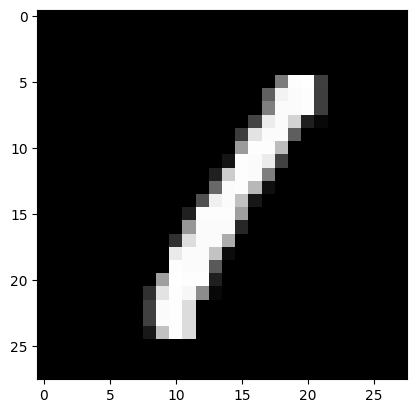

In [ ]:
x = dataset_train[3][0]
plt.imshow( x[0], cmap='gray' )

x = x.reshape(1,1,28,28)

out = model(x.to(device))
_, preds = torch.max(out,1)
print(preds)